# <center>DE assigment</center>
## <center>Innopolis University</center>
## <div style="text-align:right">Nikolai Mikriukov BS2-3 2018</div>

# Problem description
The goal of this computational practicum is to solve given initial value problem (IVP) using three numerical methods:
- Euler’s method,
- improved Euler’s method,
- Runge-Kutta method

Provide data visualization capability for these methods with availability to change range of grid steps and compare approximation errors of these methods plotting the corresponding chart for different grid sizes

Given conditions:
$$
\left\{
\begin{array}{a}
y' = x^3 y^4 - \frac{y}{x} \\ 
y(1)=\frac{1}{2} \\ 
x \in [1; 5]
\end{array}
\right.
$$

First, let's solve this problem and find exact solution
$$
y' = x^3 y^4 - \frac{y}{x} \\
y' + \frac{1}{x}y = x^3 y^4 \\
$$
Divide both parts by $y^4$ and multiply by $-3$
$$
- \frac{3 y'}{y^4} - \frac{3}{x y^3} = -3 x^3
$$
Make substitution $v(x)= y^{-3}$

Then $v'(x)=-\frac{3 y'}{y^4}$
$$
v' - \frac{3}{x}v = -3 x^3
$$
Solve it using integrating factor
$$
\eta = e^{\int -\frac{3}{x} dx} = e^{-3ln(x)} = x^{-3} \\
x^{-3}v' - \frac{3}{x^4}v=-3 \\
(\frac{v}{x^3})' = -3 \\
\frac{v}{x^3} = -3 \int dx \\
\frac{v}{x^3}=-3(x+C) \\
v=-3x^3(x+C) \\
y^{-3} = -3x^3(x+C) \\
y = \frac{1}{\sqrt[3]{-3x^3(x+C)}}
$$
Back to Cauchy problem: $y(1) = \frac{1}{2}$
$$
\frac{1}{2} = \frac{1}{\sqrt[3]{-3\,1^3(1+C)}} \\
\sqrt[3]{-3(1+C)} = 2 \\
C = -\frac{11}{3}
$$
Means our final function will be
$$
y = \frac{1}{\sqrt[3]{-3x^3(x-\frac{11}{3})}} \\
y = \frac{1}{\sqrt[3]{-x^3(3x-11)}} \\
y = - \frac{1}{x\sqrt[3]{3x-11}}
$$

It's easy to see that $y(x)$ is not continues on given interval [1; 5] because it has no value at $x=\frac{11}{3} $. Therefore, I will investigate given function on intervals [1; 3.6] and [3.7; 5]

Let's move on to the code. In the beginning, we define known parameters and the function $y'$ itself

In [1]:
def f(x, y):
    return x**3 * y**4 - y / x

x0_1 = 1
y0_1 = 1/2
X_1 = 3.6

x0_2 = 3.7
y0_2 = -0.5822796459545604  # calculated from y(x0_2)
X_2 = 5

Now I will define functions that solve problem using appropriate algorithm. Those functions will iterate through given x array and calculate y value

In [2]:
def euler(x, y0):
    h = x[1] - x[0]
    y = [y0,]
    for i in range(1, len(x)):
        x_prev, y_prev = x[i - 1], y[i - 1]
        y.append(y_prev + h * f(x_prev, y_prev))
    return y

In [3]:
def euler_improved(x, y0):
    h = x[1] - x[0]
    y = [y0,]
    for i in range(1, len(x)):
        x_prev, y_prev = x[i-1], y[i-1]
        first_step = f(x_prev, y_prev)
        second_step = f(x_prev + h, y_prev + h * first_step)
        average_step = (first_step + second_step) / 2
        y.append(y_prev + h * average_step)
    return y

In [4]:
def runge_kutta(x, y0):
    h = x[1] - x[0]
    y = [y0,]
    for i in range(1, len(x)):
        x_prev, y_prev = x[i-1], y[i-1]
        k1 = h * f(x_prev, y_prev)
        k2 = h * f(x_prev + h / 2, y_prev + k1 / 2)
        k3 = h * f(x_prev + h / 2, y_prev + k2 / 2)
        k4 = h * f(x_prev + h, y_prev + k3)
        y.append(y_prev + (k1 + 2 * k2 + 2 * k3 + k4) / 6)
    return y

In [5]:
# calculate exact value at given points to compare solutions and see local errors
def exact(x):
    y = []
    for i in range(len(x)):
        tmp = 3 * x[i] - 11
        # python has problem with cubic root from negative number
        if tmp >= 0:
            y.append(1 / (-x[i] * tmp ** (1/3)))
        else:
            y.append(1 / (x[i] * (-tmp) ** (1/3)))
    return y

Next it is possible to make visualization of found solutions. Let's make plots interactive, so we can change grid size by moving slider and analyze how this will influence on error.

Two plots will be created for each interval. First will show solutions that were found by three given algorithms together with exact solution. Second will draw error for each algorithm.

Before you run next code, make sure all required modules are installed
```
pip3 install ipywidgets matplotlib numpy ipython
```

<IPython.core.display.Javascript object>


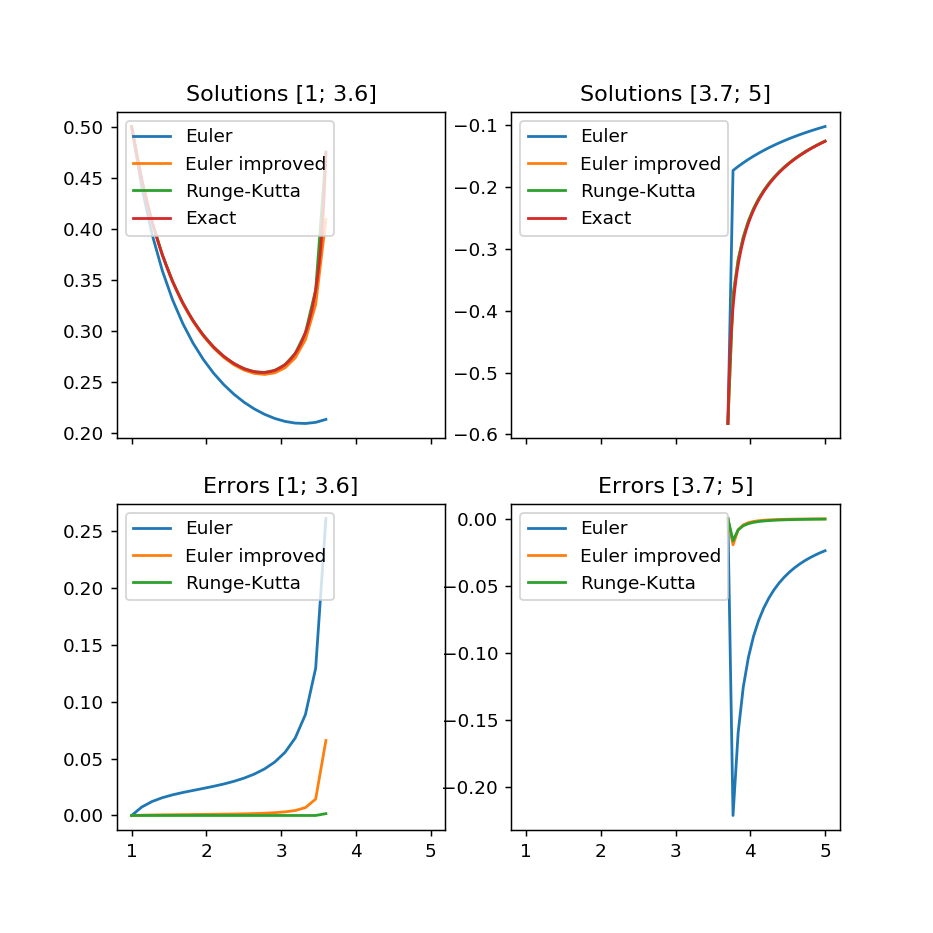

interactive(children=(IntSlider(value=20, continuous_update=False, description='Grid size:', max=500, min=20, …

In [8]:
import ipywidgets as widgets
from IPython.display import display
import matplotlib.pyplot as plt
import numpy as np
%matplotlib nbagg

fig, ax = plt.subplots(2, 2, figsize=(7, 7), sharex=True)

# need to know exact function for comparing with found solutions
x_exact_1 = np.linspace(x0_1, X_1, 1000)
y_exact_1 = exact(x_exact_1)

x_exact_2 = np.linspace(x0_2, X_2, 1000)
y_exact_2 = exact(x_exact_2)

# function is called when slider has moved
def update_plot(N):
    # split interval on given number of steps
    x_1 = np.linspace(x0_1, X_1, N)
    
    # find solutions using three algorithms and exact solution at every point
    y_euler = euler(x_1, y0_1)
    y_euler2 = euler_improved(x_1, y0_1)
    y_rk = runge_kutta(x_1, y0_1)
    y_exact = np.array(exact(x_1))
    
    # plot found solutions 
    ax[0][0].clear()
    ax[0][0].set_title('Solutions [1; 3.6]')
    ax[0][0].plot(x_1, y_euler, label='Euler')
    ax[0][0].plot(x_1, y_euler2, label='Euler improved')
    ax[0][0].plot(x_1, y_rk, label='Runge-Kutta')
    ax[0][0].plot(x_exact_1, y_exact_1, label='Exact')
    ax[0][0].legend(loc=2)
    
    # calculate local errors
    error_euler = y_exact - y_euler
    error_euler2 = y_exact - y_euler2
    error_rk = y_exact - y_rk
    
    # plot found errors
    ax[1][0].clear()
    ax[1][0].set_title('Errors [1; 3.6]')
    ax[1][0].plot(x_1, error_euler, label='Euler')
    ax[1][0].plot(x_1, error_euler2, label='Euler improved')
    ax[1][0].plot(x_1, error_rk, label='Runge-Kutta')
    ax[1][0].legend(loc=2)
    
    # same for second interval
    x_2 = np.linspace(x0_2, X_2, N)
    h_2 = (X_2 - x0_2) / N
    
    y_euler = euler(x_2, y0_2)
    y_euler2 = euler_improved(x_2, y0_2)
    y_rk = runge_kutta(x_2, y0_2)
    y_exact = np.array(exact(x_2))
    
    ax[0][1].clear()
    ax[0][1].set_title('Solutions [3.7; 5]')
    ax[0][1].plot(x_2, y_euler, label='Euler')
    ax[0][1].plot(x_2, y_euler2, label='Euler improved')
    ax[0][1].plot(x_2, y_rk, label='Runge-Kutta')
    ax[0][1].plot(x_exact_2, y_exact_2, label='Exact')
    ax[0][1].legend(loc=2)
    
    error_euler = y_exact - y_euler
    error_euler2 = y_exact - y_euler2
    error_rk = y_exact - y_rk
    
    ax[1][1].clear()
    ax[1][1].set_title('Errors [3.7; 5]')
    ax[1][1].plot(x_2, error_euler, label='Euler')
    ax[1][1].plot(x_2, error_euler2, label='Euler improved')
    ax[1][1].plot(x_2, error_rk, label='Runge-Kutta')
    ax[1][1].legend(loc=2)
    
    plt.draw()

# set continuous_update=True can be costly on resources 
grid_size_slider = widgets.IntSlider(min=20, max=500, value=20, step=5, description='Grid size:', continuous_update = False)
widgets.interactive(update_plot, N=grid_size_slider)

We can see that usual Euler is not so good for calculating near break point. In conclusion, I will compare three given methods. Let's draw plots for average local error and max local error depending on grid size $\in$ [100; 500] for both intervals

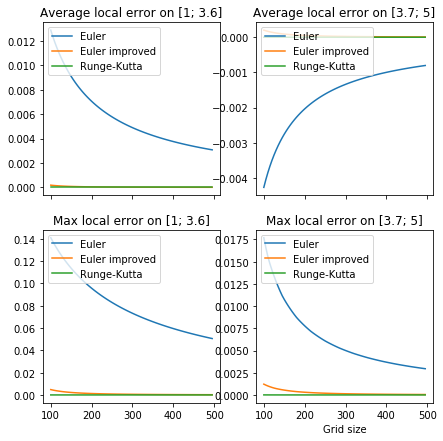

In [7]:
fig, ax = plt.subplots(2, 2, figsize=(7, 7), sharex=True)

error_average_euler_1 = []
error_average_euler2_1 = []
error_average_rk_1 = []
error_max_euler_1 = []
error_max_euler2_1 = []
error_max_rk_1 = []

error_average_euler_2 = []
error_average_euler2_2 = []
error_average_rk_2 = []
error_max_euler_2 = []
error_max_euler2_2 = []
error_max_rk_2 = []

grid_split = np.arange(100, 500, 5)

for N in grid_split:
    # split interval on given number of steps
    x_1 = np.linspace(x0_1, X_1, N)
    
    # find solutions using three algorithms and exact solution at every point
    y_euler_1 = euler(x_1, y0_1)
    y_euler2_1 = euler_improved(x_1, y0_1)
    y_rk_1 = runge_kutta(x_1, y0_1)
    y_exact_1 = np.array(exact(x_1))
    
    # calculate local errors
    error_euler_1 = y_exact_1 - y_euler_1
    error_euler2_1 = y_exact_1 - y_euler2_1
    error_rk_1 = y_exact_1 - y_rk_1
    
    # calculate average errors
    error_average_euler_1.append(sum(error_euler_1) / N)
    error_average_euler2_1.append(sum(error_euler2_1) / N)
    error_average_rk_1.append(sum(error_rk_1) / N)
    
    # calculate max errors
    error_max_euler_1.append(max(abs(error_euler_1)))
    error_max_euler2_1.append(max(abs(error_euler2_1)))
    error_max_rk_1.append(max(abs(error_rk_1)))
    
    
    x_2 = np.linspace(x0_2, X_2, N)
    
    y_euler_2 = euler(x_2, y0_2)
    y_euler2_2 = euler_improved(x_2, y0_2)
    y_rk_2 = runge_kutta(x_2, y0_2)
    y_exact_2 = np.array(exact(x_2))
    
    error_euler_2 = y_exact_2 - y_euler_2
    error_euler2_2 = y_exact_2 - y_euler2_2
    error_rk_2 = y_exact_2 - y_rk_2
    
    error_average_euler_2.append(sum(error_euler_2) / N)
    error_average_euler2_2.append(sum(error_euler2_2) / N)
    error_average_rk_2.append(sum(error_rk_2) / N)
    
    error_max_euler_2.append(max(abs(error_euler_2)))
    error_max_euler2_2.append(max(abs(error_euler2_2)))
    error_max_rk_2.append(max(abs(error_rk_2)))

ax[0][0].set_title('Average local error on [1; 3.6]')
ax[0][0].plot(grid_split, error_average_euler_1, label='Euler')
ax[0][0].plot(grid_split, error_average_euler2_1, label='Euler improved')
ax[0][0].plot(grid_split, error_average_rk_1, label='Runge-Kutta')
ax[0][0].legend(loc=2)

ax[1][0].set_title('Max local error on [1; 3.6]')
ax[1][0].plot(grid_split, error_max_euler_1, label='Euler')
ax[1][0].plot(grid_split, error_max_euler2_1, label='Euler improved')
ax[1][0].plot(grid_split, error_max_rk_1, label='Runge-Kutta')
ax[1][0].legend(loc=2)

ax[0][1].set_title('Average local error on [3.7; 5]')
ax[0][1].plot(grid_split, error_average_euler_2, label='Euler')
ax[0][1].plot(grid_split, error_average_euler2_2, label='Euler improved')
ax[0][1].plot(grid_split, error_average_rk_2, label='Runge-Kutta')
ax[0][1].legend(loc=2)

ax[1][1].set_title('Max local error on [3.7; 5]')
ax[1][1].plot(grid_split, error_max_euler_2, label='Euler')
ax[1][1].plot(grid_split, error_max_euler2_2, label='Euler improved')
ax[1][1].plot(grid_split, error_max_rk_2, label='Runge-Kutta')
ax[1][1].legend(loc=2)

plt.xlabel('Grid size')
plt.show()

We may notice that improved Euler method and Runge-Kutta are better than Euler and after range of grid is bigger than 200, Runge-Kutta and Euler improved are almost identical. Usual Euler method is not so accurate.